# Chinese Postman Problem (CPP)
What is the shortest path that starts and ends at the same node, and covers every edge at least once?<br>

## Eulerian graph
If all vertices in the graph have even degree then the solution is easy, because you just have to find an Eulerian circuit.

## Non eulerian graph
If some vertices have odd degree then there´s not directly solution and we are gonna have to add extra edges to make it Eurelian.

### Check for eulerian graph
First, check if all nodes have even degree (i.e. if it's already Eulerian)

The graph is not Eulerian
Odd degree nodes: [('a', 3), ('b', 3), ('d', 3), ('c', 3)]


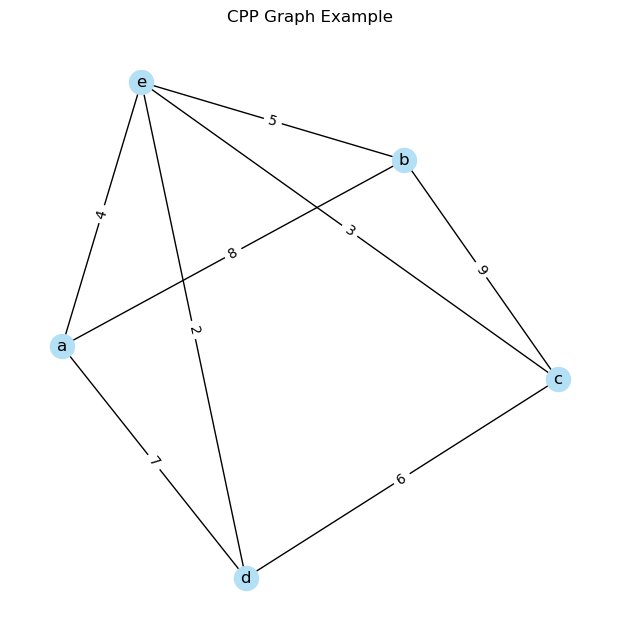

In [ ]:
import networkx as nx
from cpp_graphs import random_cpp_graph, random_dcpp_graph, draw_graph

G = nx.Graph()
G.add_weighted_edges_from([
    ("a", "b", 8), # start of edge, end of edge, weight
    ("a", "d", 7),
    ("a", "e", 4),
    ("b", "c", 9),
    ("b", "e", 5),
    ("c","d",6),
    ("c", "e", 3),
    ("d", "e", 2),
])


check_list = [e for e in G.degree() if e[1] % 2 != 0]
if len(check_list) == 0:
    print("The graph is Eulerian")
else:
    print("The graph is not Eulerian")
    print("Odd degree nodes:", check_list)
draw_graph(G, "CPP Graph Example")
